In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from tslearn.clustering import KShape, TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset
from sklearn.metrics import adjusted_rand_score
from utils import chart_ts

/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


## Data processing

### Read data

In [2]:
df = pd.read_csv("all_coins_data.csv")
df.sort_values(["coin", "time"], inplace = True)
df = df[["time","daily_log_return", "coin"]]

In [3]:
df=df.pivot(index="time", columns="coin",values="daily_log_return").reset_index()
df.head()

coins_list = df.columns.tolist()[1:]

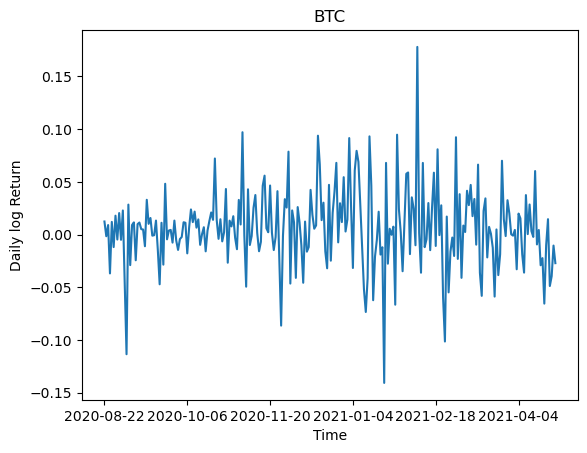

In [4]:
chart_ts(df, 6, coins_list)

## Max Adjusted Rand Score

In [5]:
max_ars = pd.DataFrame({"Cluster_number":[], "Adjusted Rand Score":[]})
for i in range(2, 25):
    data_array = np.array(df.T.drop('time').values)
    model = TimeSeriesKMeans(n_clusters=i, metric="dtw", max_iter=10)
    model.fit(data_array)
    coins = df.T.drop('time').index.tolist()
    y = model.predict(data_array)
    x = df.time
    max_ars.loc[len(max_ars.index)] = [i, adjusted_rand_score(df.drop("time", axis = 1).median(axis=0).values, y)]


/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 45 1-dimensional timeseries
  warnings.warn(
/home/fede/anaconda3/envs/ts/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


ValueError: cannot set a row with mismatched columns

In [ ]:
max_ars

NameError: name 'max_ars' is not defined

In [ ]:
pd.DataFrame({"coin":df.drop(["time"], axis = 1).columns.tolist(),
"cluster":y})

,coin,cluster
0,ADA,3
1,ALGO,3
2,ATOM,3
3,BCH,3
4,BNB,3
5,BSV,3
6,BTC,2
7,BUSD,2
8,CRO,3
9,CTC,1


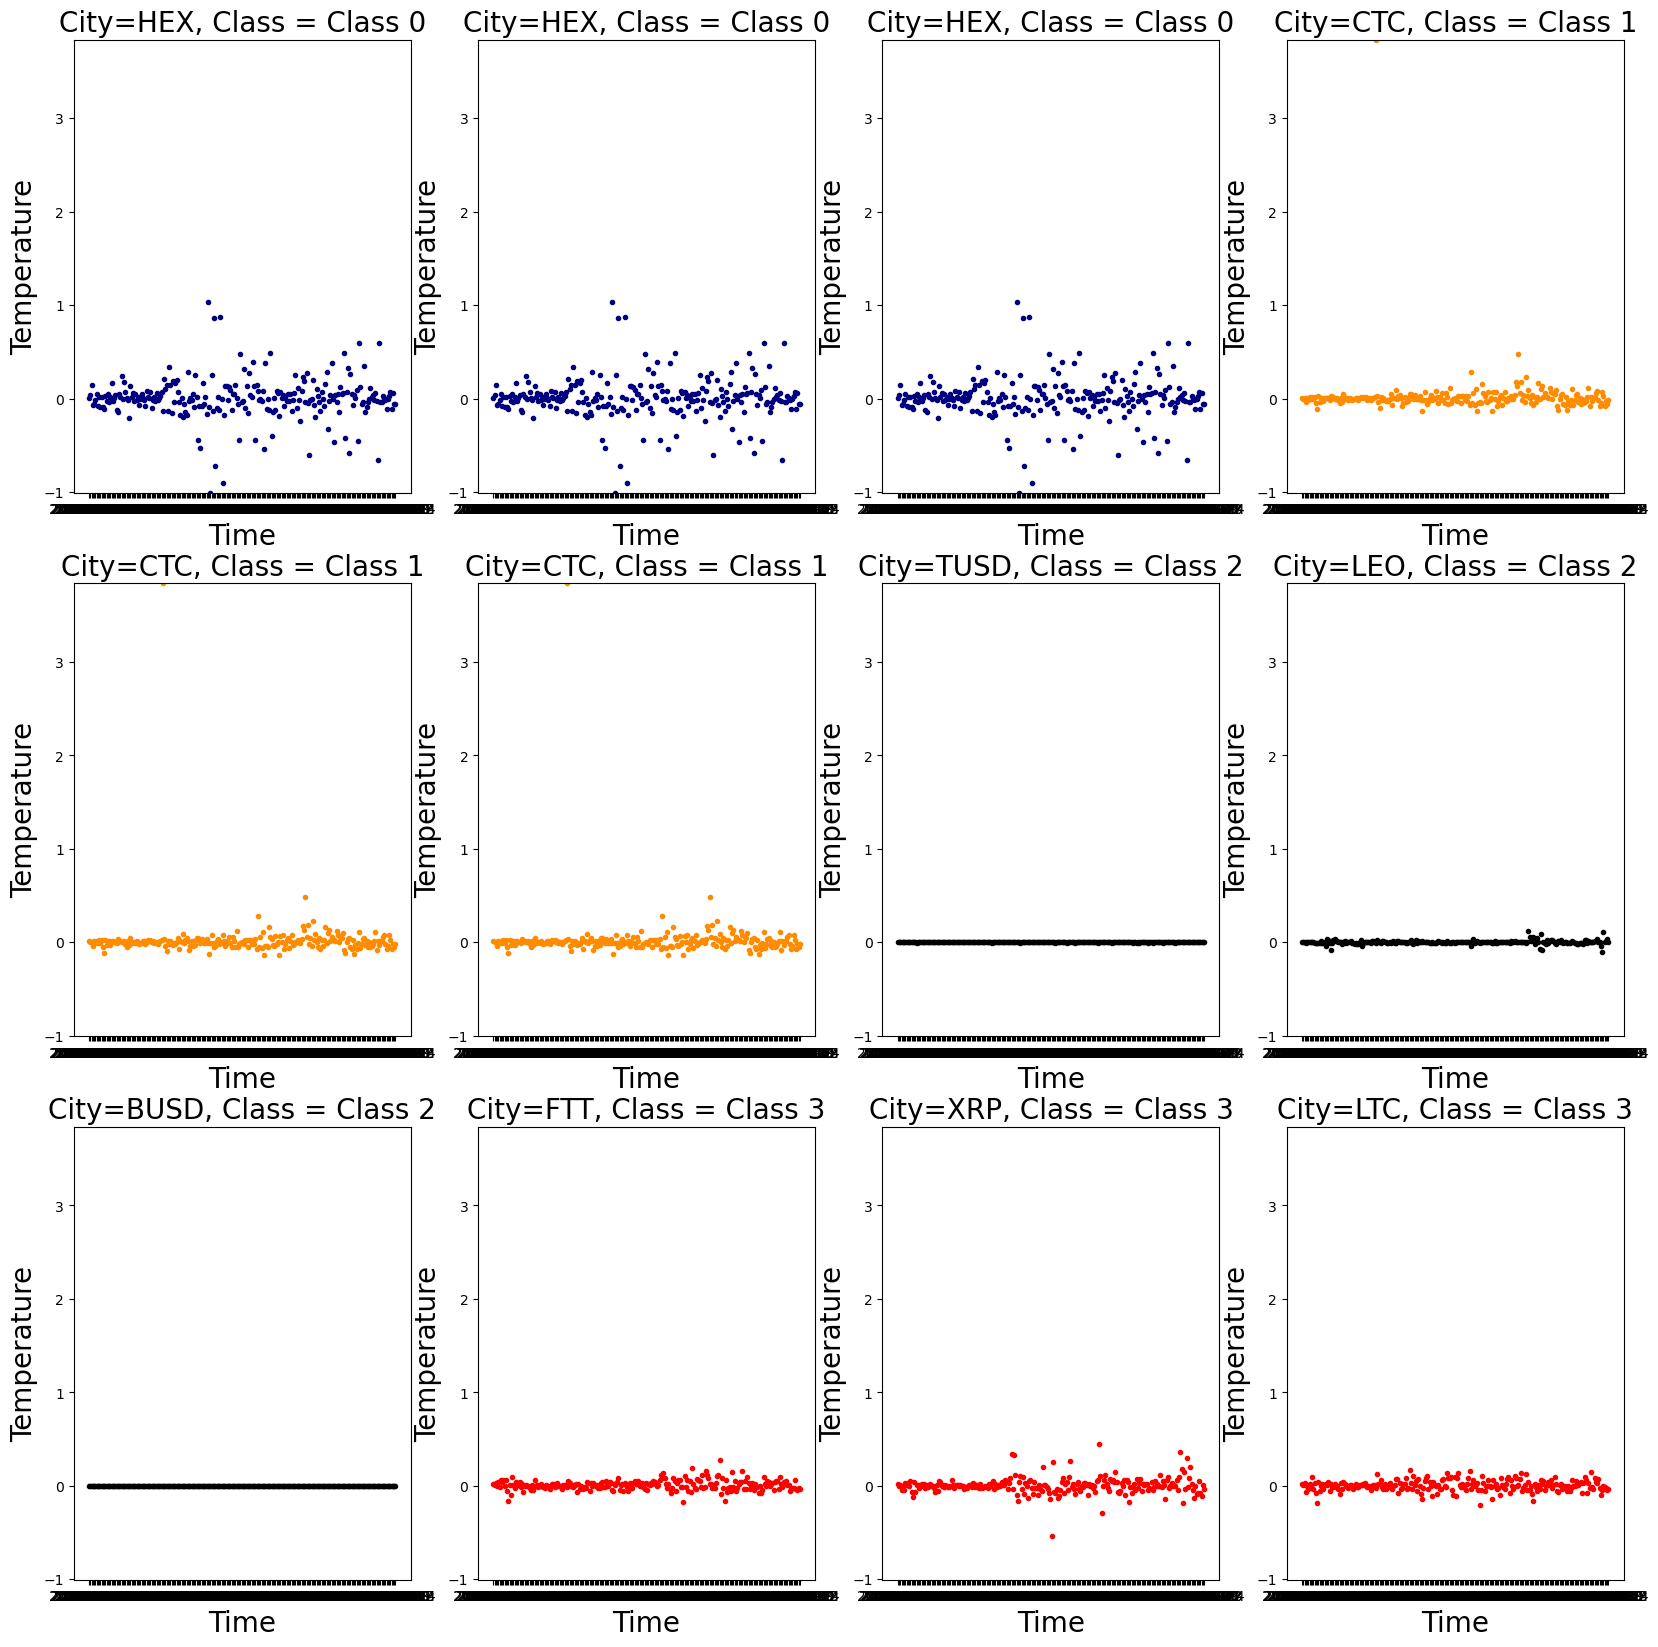

In [ ]:
plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2, '10':3, '11':3, '12':3}
colors = ['navy']*3+['darkorange']*3+['k']*3 + ['red']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3 + ['Class 3']*3
for j in range(1,13):
    plt.subplot(3,4,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.plot(x,data_array[k],'.',color=colors[j-1])
    plt.ylabel('Temperature',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('City=%s, Class = %s'%(coins_list[k],Names[j-1]),fontsize=20)
    plt.ylim(data_array.min(),data_array.max())

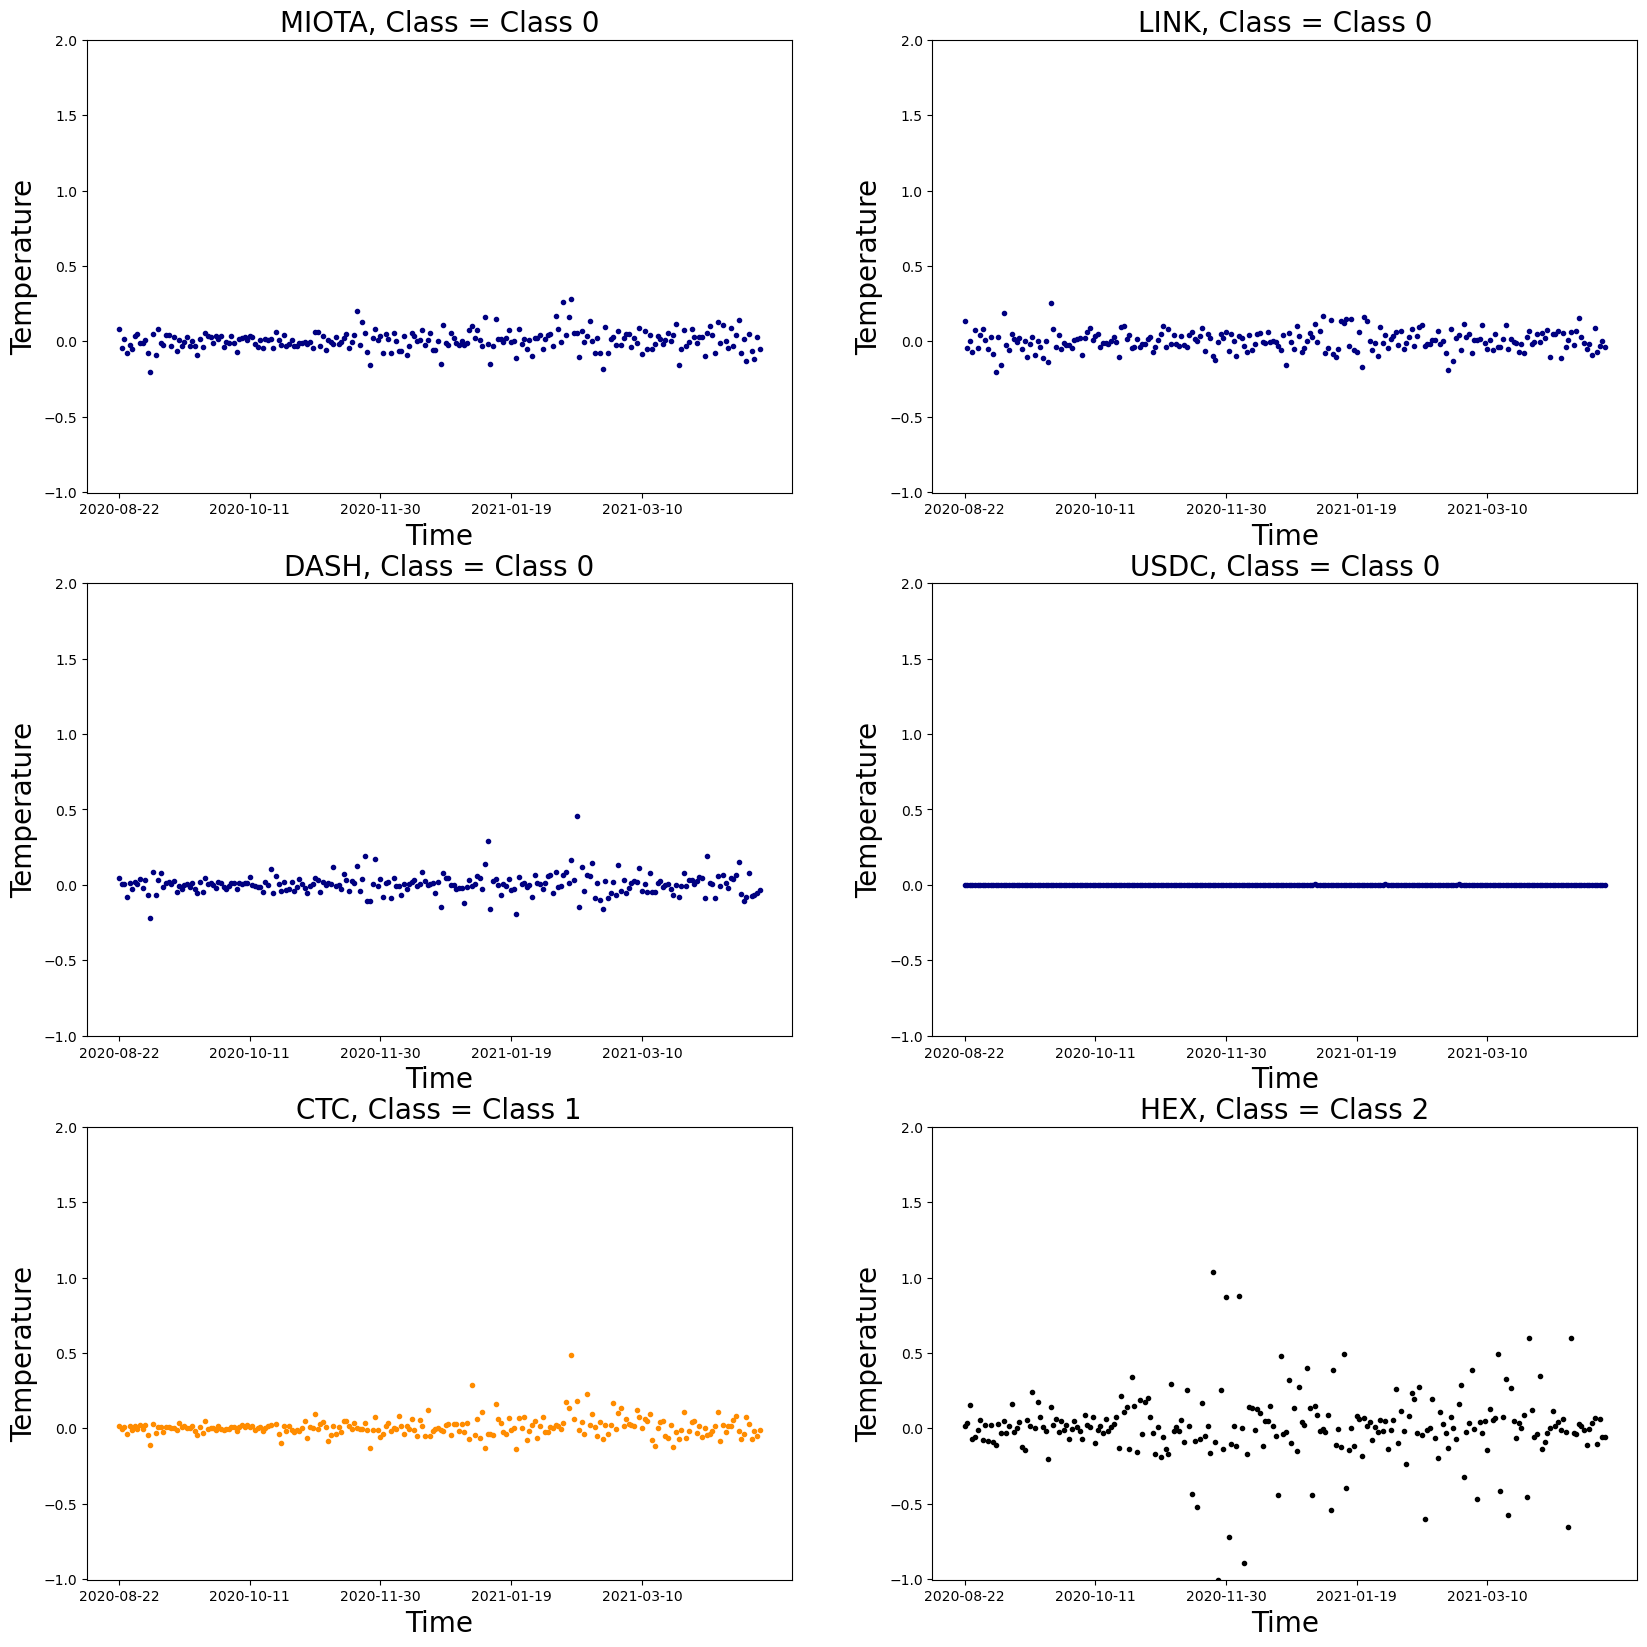

In [ ]:
plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':0,'5':1, '6':2}
colors = ['navy']*4+['darkorange']*1+['k']*1
Names = ['Class 0']*4+['Class 1']*1+['Class 2']*1
for j in range(1,7):
    plt.subplot(3,2,j)
    ax = plt.gca()
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.plot(x,data_array[k],'.',color=colors[j-1])
    ax.set_xticks(ax.get_xticks()[::50])
    plt.ylabel('Temperature',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('%s, Class = %s'%(coins_list[k],Names[j-1]),fontsize=20)
    plt.ylim(data_array.min(),2)